# Group By

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Vegas = pd.read_csv('vegas.csv')

In [5]:
Vegas.columns

Index(['User country', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes',
       'Score', 'Period of stay', 'Traveler type', 'Pool', 'Gym',
       'Tennis court', 'Spa', 'Casino', 'Free internet', 'Hotel name',
       'Hotel stars', 'Nr. rooms', 'User continent', 'Member years',
       'Review month', 'Review weekday'],
      dtype='object')

In [6]:
Vegas.columns.str.replace('\.*\s+', '_')

# pattern we are looking for is whitespace, period, 

/var/folders/xj/j51mz36s00z2vnfq7wp23hxm0000gn/T/ipykernel_32704/1636590783.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Vegas.columns.str.replace('\.*\s+', '_')


Index(['User_country', 'Nr_reviews', 'Nr_hotel_reviews', 'Helpful_votes',
       'Score', 'Period_of_stay', 'Traveler_type', 'Pool', 'Gym',
       'Tennis_court', 'Spa', 'Casino', 'Free_internet', 'Hotel_name',
       'Hotel_stars', 'Nr_rooms', 'User_continent', 'Member_years',
       'Review_month', 'Review_weekday'],
      dtype='object')

In [7]:
Vegas.columns = Vegas.columns.str.replace('\.*\s+', '_').str.lower()

/var/folders/xj/j51mz36s00z2vnfq7wp23hxm0000gn/T/ipykernel_32704/3735199667.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Vegas.columns = Vegas.columns.str.replace('\.*\s+', '_').str.lower()


In [8]:
Vegas.columns

Index(['user_country', 'nr_reviews', 'nr_hotel_reviews', 'helpful_votes',
       'score', 'period_of_stay', 'traveler_type', 'pool', 'gym',
       'tennis_court', 'spa', 'casino', 'free_internet', 'hotel_name',
       'hotel_stars', 'nr_rooms', 'user_continent', 'member_years',
       'review_month', 'review_weekday'],
      dtype='object')

---

# Start Here

## grouping a dataframe

#### Two ways of grouping

In [10]:
by_hotel = Vegas.groupby(Vegas.hotel_name)

In [11]:
by_hotel

In [13]:
by_hotel = Vegas.groupby('hotel_name')

In [14]:
by_hotel

In [15]:
# DataFrameGroupBy object

### in order to see the output of the group_by variable, you will need to use the get_group function

In [19]:
by_hotel.get_group(Vegas.hotel_name[0]).head(5)

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


---

In [20]:
by_hotel.mean()

,nr_reviews,nr_hotel_reviews,helpful_votes,score,nr_rooms,member_years
hotel_name,,,,,,
Bellagio Las Vegas,27.71,10.21,24.88,4.21,"3,933.00",3.42
Caesars Palace,38.00,15.29,26.38,4.12,"3,348.00",4.75
Circus Circus Hotel & Casino Las Vegas,29.21,7.79,18.50,3.21,"3,773.00",3.83
Encore at wynn Las Vegas,57.17,16.33,36.75,4.54,"2,034.00",4.75
Excalibur Hotel & Casino,45.58,22.12,31.75,3.71,"3,981.00",4.50
Hilton Grand Vacations at the Flamingo,48.42,23.04,32.46,3.96,315.00,3.96
Hilton Grand Vacations on the Boulevard,36.92,15.54,20.83,4.17,"1,228.00",4.79
Marriott's Grand Chateau,90.04,30.42,57.33,4.54,732.00,4.38
Monte Carlo Resort&Casino,71.83,17.46,39.25,3.29,"3,003.00",3.58


In [22]:
by_traveler = Vegas.groupby('traveler_type')
by_traveler

In [25]:
by_traveler.get_group(Vegas.traveler_type[0]).head(5)

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
8,India,24,3,8,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Asia,3,May,Saturday
11,Australia,20,9,24,3,Jun-Aug,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Oceania,4,June,Saturday
12,USA,7,6,9,2,Jun-Aug,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,1,July,Wednesday


In [26]:
by_traveler.mean()

,nr_reviews,nr_hotel_reviews,helpful_votes,score,nr_rooms,member_years
traveler_type,,,,,,
Business,72.00,23.68,42.27,3.88,"1,964.99",4.16
Couples,45.68,14.79,32.10,4.23,"2,299.20",4.43
Families,45.11,14.32,26.18,4.02,"2,067.17",4.26
Friends,39.66,14.52,29.46,4.26,"2,242.13",4.32
Solo,39.17,16.33,29.54,3.92,"2,428.96",-70.54


---

In [27]:
by_hotel.mean()

,nr_reviews,nr_hotel_reviews,helpful_votes,score,nr_rooms,member_years
hotel_name,,,,,,
Bellagio Las Vegas,27.71,10.21,24.88,4.21,"3,933.00",3.42
Caesars Palace,38.00,15.29,26.38,4.12,"3,348.00",4.75
Circus Circus Hotel & Casino Las Vegas,29.21,7.79,18.50,3.21,"3,773.00",3.83
Encore at wynn Las Vegas,57.17,16.33,36.75,4.54,"2,034.00",4.75
Excalibur Hotel & Casino,45.58,22.12,31.75,3.71,"3,981.00",4.50
Hilton Grand Vacations at the Flamingo,48.42,23.04,32.46,3.96,315.00,3.96
Hilton Grand Vacations on the Boulevard,36.92,15.54,20.83,4.17,"1,228.00",4.79
Marriott's Grand Chateau,90.04,30.42,57.33,4.54,732.00,4.38
Monte Carlo Resort&Casino,71.83,17.46,39.25,3.29,"3,003.00",3.58


In [28]:
# notice that lit automatically dropped a bunch of columns

In [29]:
# all non numeric columns are dropped automatically

### you can group by more than one key

In [31]:
Vegas.groupby(['traveler_type', 'pool'])

In [32]:
Vegas.groupby(['traveler_type', 'pool']).mean()

nr_reviews  nr_hotel_reviews  helpful_votes  score  \
traveler_type pool                                                       
Business      NO        119.00             21.00          75.00   3.00   
              YES        71.36             23.71          41.82   3.89   
Couples       NO         20.43              6.86          18.00   2.71   
              YES        46.54             15.06          32.58   4.29   
Families      NO         41.62              9.50          20.00   3.38   
              YES        45.38             14.70          26.67   4.07   
Friends       NO         14.43              5.29          11.57   3.43   
              YES        42.01             15.39          31.13   4.33   
Solo          NO          5.00              5.00           2.00   4.00   
              YES        40.65             16.83          30.74   3.91   

                    nr_rooms  member_years  
traveler_type pool                          
Business      NO    3,773.00          3.00  
              YES   1,940.22          4.18  
Couples       NO    3,773.00          4.71  
              YES   2,249.36          4.43  
Families      NO    3,773.00          3.00  
              YES   1,933.38          4.36  
Friends       NO    3,773.00          3.57  
              YES   2,099.25          4.39  
Solo          NO    3,773.00          7.00  
              YES   2,370.52        -73.91

In [33]:
Vegas.groupby(['traveler_type', 'pool']).mean().unstack()

nr_reviews       nr_hotel_reviews       helpful_votes        \
pool                  NO   YES               NO   YES            NO   YES   
traveler_type                                                               
Business          119.00 71.36            21.00 23.71         75.00 41.82   
Couples            20.43 46.54             6.86 15.06         18.00 32.58   
Families           41.62 45.38             9.50 14.70         20.00 26.67   
Friends            14.43 42.01             5.29 15.39         11.57 31.13   
Solo                5.00 40.65             5.00 16.83          2.00 30.74   

              score      nr_rooms          member_years         
pool             NO  YES       NO      YES           NO    YES  
traveler_type                                                   
Business       3.00 3.89 3,773.00 1,940.22         3.00   4.18  
Couples        2.71 4.29 3,773.00 2,249.36         4.71   4.43  
Families       3.38 4.07 3,773.00 1,933.38         3.00   4.36  
Friends        3.43 4.33 3,773.00 2,099.25         3.57   4.39  
Solo           4.00 3.91 3,773.00 2,370.52         7.00 -73.91

In [34]:
# number fo rooms don't make sense 
# this is an irrelevant metric

#### pull out only a subset of columns you are interested

In [35]:
Vegas.groupby(['traveler_type', 'pool'])['score', 'member_years']

/var/folders/xj/j51mz36s00z2vnfq7wp23hxm0000gn/T/ipykernel_32704/4189586254.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Vegas.groupby(['traveler_type', 'pool'])['score', 'member_years']


In [36]:
Vegas.groupby(['traveler_type', 'pool'])['score', 'member_years'].mean()

/var/folders/xj/j51mz36s00z2vnfq7wp23hxm0000gn/T/ipykernel_32704/2671342003.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Vegas.groupby(['traveler_type', 'pool'])['score', 'member_years'].mean()


score  member_years
traveler_type pool                     
Business      NO     3.00          3.00
              YES    3.89          4.18
Couples       NO     2.71          4.71
              YES    4.29          4.43
Families      NO     3.38          3.00
              YES    4.07          4.36
Friends       NO     3.43          3.57
              YES    4.33          4.39
Solo          NO     4.00          7.00
              YES    3.91        -73.91

---

## you could laso do this by first preselecting the columns in the df

In [39]:
Vegas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_country      504 non-null    object
 1   nr_reviews        504 non-null    int64 
 2   nr_hotel_reviews  504 non-null    int64 
 3   helpful_votes     504 non-null    int64 
 4   score             504 non-null    int64 
 5   period_of_stay    504 non-null    object
 6   traveler_type     504 non-null    object
 7   pool              504 non-null    object
 8   gym               504 non-null    object
 9   tennis_court      504 non-null    object
 10  spa               504 non-null    object
 11  casino            504 non-null    object
 12  free_internet     504 non-null    object
 13  hotel_name        504 non-null    object
 14  hotel_stars       504 non-null    object
 15  nr_rooms          504 non-null    int64 
 16  user_continent    504 non-null    object
 17  member_years    

In [41]:
Vegas[['score', 'member_years']]

,score,member_years
0,5,9
1,3,3
2,5,2
3,4,6
4,4,7
...,...,...
499,5,1
500,4,8
501,4,4
502,2,9


#### see that traveler type is not a columnin the new df

In [42]:
Vegas[['score', 'member_years']].groupby(['traveler_type'])

KeyError: 'traveler_type'

In [43]:
Vegas[['score', 'member_years']].groupby([Vegas.traveler_type, Vegas.pool])

In [44]:
Vegas[['score', 'member_years']].groupby([Vegas.traveler_type, Vegas.pool]).mean()

score  member_years
traveler_type pool                     
Business      NO     3.00          3.00
              YES    3.89          4.18
Couples       NO     2.71          4.71
              YES    4.29          4.43
Families      NO     3.38          3.00
              YES    4.07          4.36
Friends       NO     3.43          3.57
              YES    4.33          4.39
Solo          NO     4.00          7.00
              YES    3.91        -73.91

# most common method of grouping

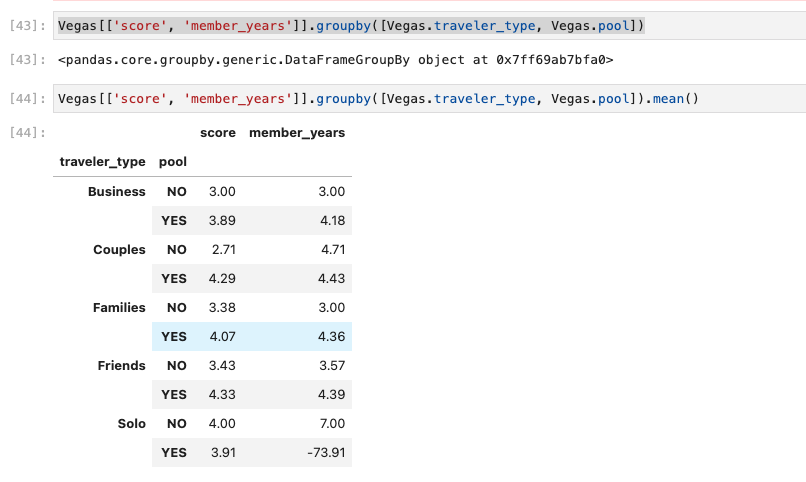

---

# Other methods of grouping (using Index)

## as function

## as dictionary

---

In [45]:
# to use a function, the group by must be the index

In [46]:
Vegas.set_index('hotel_name').head(5)

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
hotel_name,,,,,,,,,,,,,,,,,,,
Circus Circus Hotel & Casino Las Vegas,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,3,3773,North America,9,January,Thursday
Circus Circus Hotel & Casino Las Vegas,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,3,3773,North America,3,January,Friday
Circus Circus Hotel & Casino Las Vegas,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,3,3773,North America,2,February,Saturday
Circus Circus Hotel & Casino Las Vegas,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,3,3773,Europe,6,February,Friday
Circus Circus Hotel & Casino Las Vegas,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,3,3773,North America,7,March,Tuesday


In [47]:
def fnc(name):
    if 'Circus' in name or 'flamingo' in name:
        return 'preferred hotel'
    else:
        return 'non-preferred'

---

#### apply the function

In [48]:
# set index
Vegas.set_index('hotel_name')

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
hotel_name,,,,,,,,,,,,,,,,,,,
Circus Circus Hotel & Casino Las Vegas,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,3,3773,North America,9,January,Thursday
Circus Circus Hotel & Casino Las Vegas,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,3,3773,North America,3,January,Friday
Circus Circus Hotel & Casino Las Vegas,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,3,3773,North America,2,February,Saturday
Circus Circus Hotel & Casino Las Vegas,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,3,3773,Europe,6,February,Friday
Circus Circus Hotel & Casino Las Vegas,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,3,3773,North America,7,March,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Westin las Vegas Hotel Casino & Spa,UK,15,4,8,5,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,4,826,Europe,1,October,Sunday
The Westin las Vegas Hotel Casino & Spa,Canada,50,13,29,4,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,4,826,North America,8,November,Thursday
The Westin las Vegas Hotel Casino & Spa,USA,154,23,31,4,Sep-Nov,Friends,YES,YES,NO,YES,YES,YES,4,826,North America,4,November,Thursday


In [51]:
# apply the new group by function

Vegas.set_index('hotel_name').groupby(fnc)

In [52]:
Vegas.set_index('hotel_name').groupby(fnc).mean()

,nr_reviews,nr_hotel_reviews,helpful_votes,score,nr_rooms,member_years
hotel_name,,,,,,
non-preferred,49.08,16.44,32.41,4.17,"2,117.55",0.61
preferred hotel,29.21,7.79,18.50,3.21,"3,773.00",3.83


---

### use dictionary

In [53]:
# dont see the style often